# Determing Optimal Match Number for FDR Calculations (library peak max = 31)

In [30]:
import pandas as pd
import re
from matplotlib import pyplot
import csodiaq_base_functions as cbf
import csodiaq_figure_functions as cff
import csodiaq_menu_functions as menu
import os
from matplotlib.font_manager import FontProperties
pd.set_option('display.max_rows', None)

## Loading Results

In [31]:
files = list(os.listdir('Data/Output'))
removables = ['unfilteredPpmPerRow', 'filteredBestMatch', 'offset_tolerance', 'ppmSpread', 'ppmSpreadDecoy', '.DS_Store']
csodiaq = []
check = True
for f in files:
    for r in removables:
        if r in f:
            check = False
    if check:
        csodiaq.append('Data/Output/'+f)
    check = True

csodiaq = sorted(csodiaq)
for x in csodiaq: print(x)

Data/Output/csodiaq_lib-human-10peaks-noloss-pt2mz-400to2000_exp-n1b.csv
Data/Output/csodiaq_lib-human-10peaks-noloss-pt2mz-400to2000_exp-n1b_corrected.csv
Data/Output/csodiaq_lib-human-10peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_peptideFDR.csv
Data/Output/csodiaq_lib-human-10peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_proteinFDR.csv
Data/Output/csodiaq_lib-human-10peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_spectralFDR.csv
Data/Output/csodiaq_lib-human-10peaks-noloss-pt2mz-400to2000_exp-n1b_peptideFDR.csv
Data/Output/csodiaq_lib-human-10peaks-noloss-pt2mz-400to2000_exp-n1b_proteinFDR.csv
Data/Output/csodiaq_lib-human-10peaks-noloss-pt2mz-400to2000_exp-n1b_spectralFDR.csv
Data/Output/csodiaq_lib-human-5peaks-noloss-pt2mz-400to2000_exp-n1b.csv
Data/Output/csodiaq_lib-human-5peaks-noloss-pt2mz-400to2000_exp-n1b_corrected.csv
Data/Output/csodiaq_lib-human-5peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_peptideFDR.csv
Data/Output/csodiaq_lib-human-5peaks-noloss-pt2mz-400to2000_e

In [32]:
#for x in csodiaq: print(x); cff.write_meta_analysis_files(x)
listOfFiles = list(os.listdir('Data/Figures/FDRGraphs/'))
listOfFiles = sorted(['Data/Figures/FDRGraphs/'+x for x in listOfFiles])
print(len(listOfFiles))

#listOfFiles = listOfFiles[:16]
#listOfFiles = listOfFiles[16:34]
#listOfFiles = listOfFiles[34:52]
#listOfFiles = listOfFiles[52:70]
#listOfFiles = listOfFiles[70:]

#listOfFiles = [x for x in listOfFiles if '5peaks' in x]
listOfFiles = [x for x in listOfFiles if '10peaks' in x]
#listOfFiles = [x for x in listOfFiles if '20peaks' in x]
#listOfFiles = [x for x in listOfFiles if '31peaks' in x]


listOfFiles

55


['Data/Figures/FDRGraphs/csodiaq_lib-human-10peaks-noloss-pt2mz-400to2000_exp-n1b_FDRGraph_peptide.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-10peaks-noloss-pt2mz-400to2000_exp-n1b_FDRGraph_protein.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-10peaks-noloss-pt2mz-400to2000_exp-n1b_FDRGraph_spectral.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-10peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_peptide.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-10peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_protein.csv',
 'Data/Figures/FDRGraphs/csodiaq_lib-human-10peaks-noloss-pt2mz-400to2000_exp-n1b_corrected_FDRGraph_spectral.csv']

In [33]:
def make_graph_df(listOfFiles):
    concatLists = []
    for file in listOfFiles:
        temp = pd.read_csv(file)
        groupName = re.sub('Data/Figures/FDRGraphs/(.*)\.csv', r'\1', file)
        if 'corrected' in groupName: groupName = 'corrected'
        else: groupName = 'uncorrected'
        temp['group'] = [groupName for x in range(len(temp))]
        concatLists.append(temp)
    return pd.concat(concatLists)

In [34]:
spectrum = make_graph_df([x for x in listOfFiles if 'spectral' in x])
spectrum

,matches,FDRCutoff,cosine,FDRDecoys,group
0,4,0,0.000000,0,uncorrected
1,5,0,0.000000,0,uncorrected
2,6,13234,0.937613,132,uncorrected
3,7,9480,0.787391,94,uncorrected
4,8,5462,0.435951,8,uncorrected
5,9,2999,0.596722,0,uncorrected
6,10,1347,0.666340,0,uncorrected
7,11,1,0.990836,0,uncorrected
0,4,0,0.000000,0,corrected
1,5,0,0.000000,0,corrected


In [35]:
peptide = make_graph_df([x for x in listOfFiles if 'peptide' in x])
peptide

,matches,FDRCutoff,cosine,FDRDecoys,group
0,4,0,0.000000,0,uncorrected
1,5,0,0.000000,0,uncorrected
2,6,3111,0.973690,31,uncorrected
3,7,2766,0.911768,27,uncorrected
4,8,1794,0.506024,8,uncorrected
5,9,988,0.596722,0,uncorrected
6,10,487,0.821393,0,uncorrected
7,11,1,0.990836,0,uncorrected
0,4,0,0.000000,0,corrected
1,5,0,0.000000,0,corrected


In [36]:
protein = make_graph_df([x for x in listOfFiles if 'protein' in x])
protein

,matches,FDRCutoff,cosine,FDRDecoys,group
0,4,0,0.000000,0,uncorrected
1,5,0,0.000000,0,uncorrected
2,6,485,0.991312,4,uncorrected
3,7,487,0.974357,2,uncorrected
4,8,307,0.988679,0,uncorrected
5,9,183,0.974393,0,uncorrected
6,10,89,0.975599,0,uncorrected
7,11,0,0.000000,0,uncorrected
0,4,0,0.000000,0,corrected
1,5,0,0.000000,0,corrected


In [37]:
fontP = FontProperties()
fontP.set_size('medium')

## Optimal FDR Cutoff

### Spectral Level Analysis

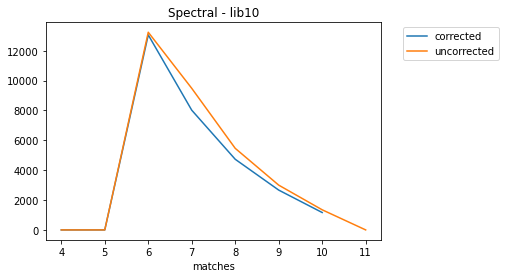

In [41]:
spectrumFDR = spectrum.pivot(index='matches', columns='group', values='FDRCutoff')
spectrumFDR.plot()
pyplot.title('Spectral - lib10')
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

### Peptide Level Analysis

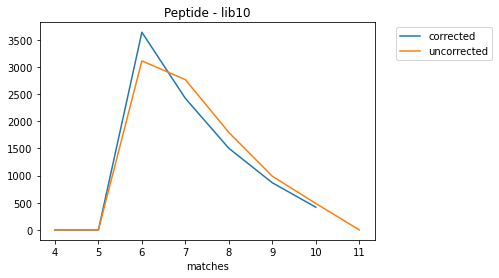

In [42]:
peptideFDR = peptide.pivot(index='matches', columns='group', values='FDRCutoff')
peptideFDR.plot()
pyplot.title('Peptide - lib10')
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

### Protein Level Analysis

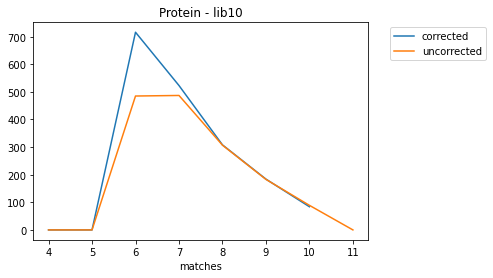

In [43]:
proteinFDR = protein.pivot(index='matches', columns='group', values='FDRCutoff')
proteinFDR.plot()
pyplot.title('Protein - lib10')
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

## Percentage FDR Representation

### Data Rearrangement

In [35]:
spectrum = spectrum.reset_index(drop=True)
peptide = spectrum.reset_index(drop=True)
protein = protein.reset_index(drop=True)

spectrum['%'] = [(spectrum['FDRCutoff'].loc[i]/spectrum['total'].loc[i]) for i in range(len(spectrum))]
peptide['%'] = [(peptide['FDRCutoff'].loc[i]/peptide['total'].loc[i]) for i in range(len(peptide))]
protein['%'] = [(protein['FDRCutoff'].loc[i]/protein['total'].loc[i]) for i in range(len(protein))]

### Spectrum Level Analysis

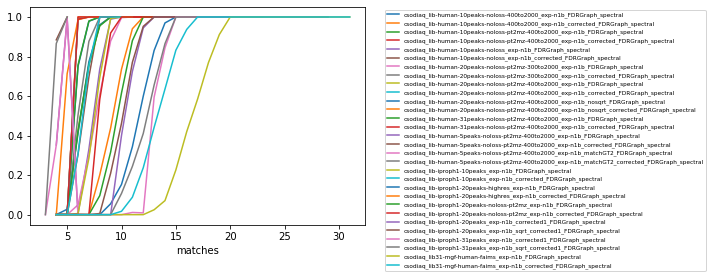

In [36]:
spectrumPerc = spectrum.pivot(index='matches', columns='group', values='%')
spectrumPerc.plot()
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

### Peptide Level Analysis

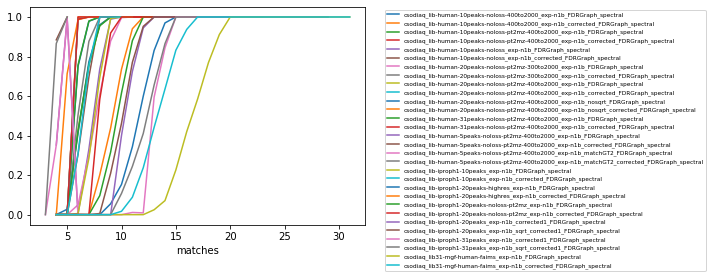

In [37]:
peptidePerc = peptide.pivot(index='matches', columns='group', values='%')
peptidePerc.plot()
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

### Protein Level Analysis

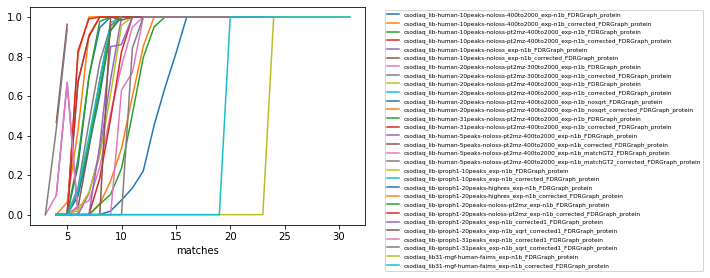

In [38]:
proteinPerc = protein.pivot(index='matches', columns='group', values='%')
proteinPerc.plot()
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

## Cosine

### Spectrum Level Analysis

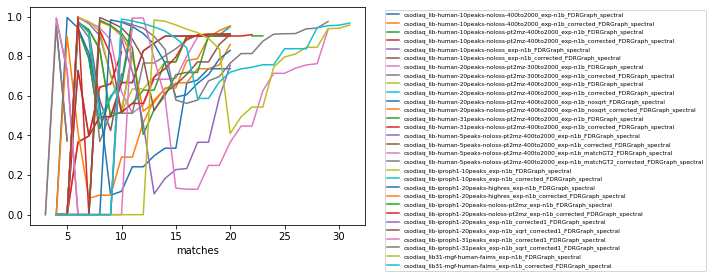

In [39]:
spectrumCos = spectrum.pivot(index='matches', columns='group', values='cosine')
spectrumCos.plot()
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

### Peptide Level Analysis

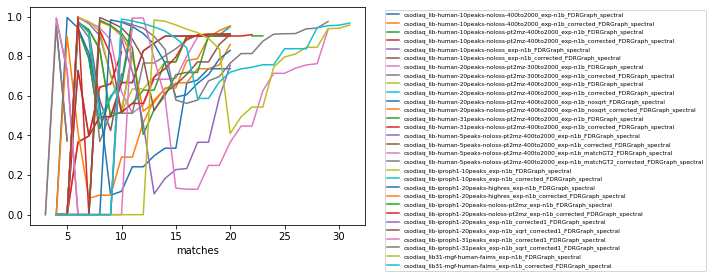

In [40]:
peptideCos = peptide.pivot(index='matches', columns='group', values='cosine')
peptideCos.plot()
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

### Protein Level Analysis

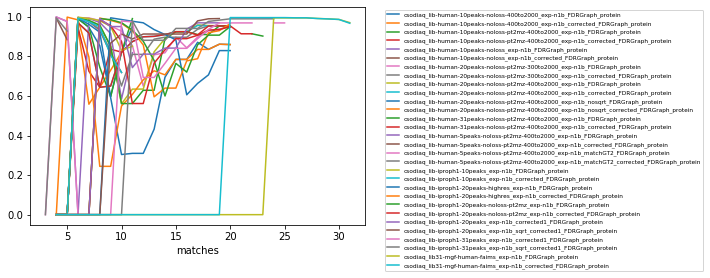

In [41]:
proteinCos = protein.pivot(index='matches', columns='group', values='cosine')
proteinCos.plot()
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

## Decoys (total)

### Spectral Level Analysis

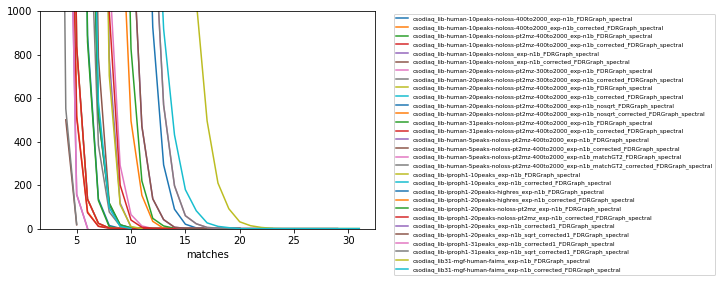

In [42]:
spectrumDec = spectrum.pivot(index='matches', columns='group', values='totalDecoys')
p1 = spectrumDec.plot()
p1.set_ylim(0,1000)
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

### Peptide Level Analysis

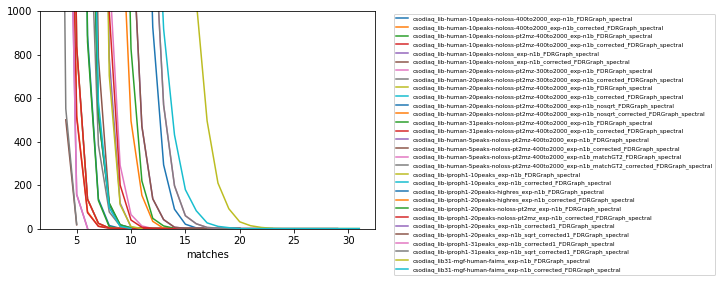

In [43]:
peptideDec = peptide.pivot(index='matches', columns='group', values='totalDecoys')
p2 = peptideDec.plot()
p2.set_ylim(0,1000)
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

### Protein Level Analysis

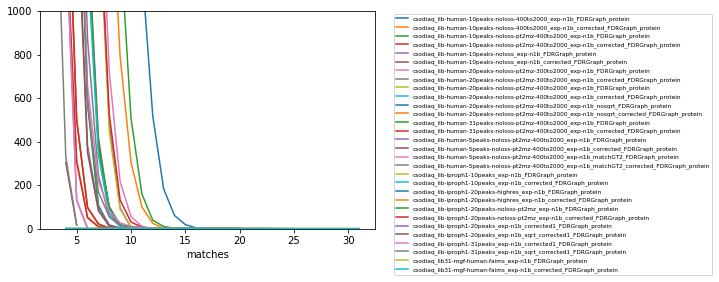

In [44]:
proteinDec = protein.pivot(index='matches', columns='group', values='totalDecoys')
p3 = proteinDec.plot()
p3.set_ylim(0,1000)
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

## Histograms With Decoys

### Spectral Level Analysis

#enter csodiaq ppm spread file creation:
#2:11:27.572490
1
2
3
4
5
#Complete
#2:11:46.485636
#enter csodiaq ppm spread file creation:
#2:11:46.485805
1
2
3
4
5
#Complete
#2:11:50.586732
Data/Output/csodiaq_lib-human-31peaks-noloss-pt2mz-400to2000_exp-n1b.csv
439895
158127


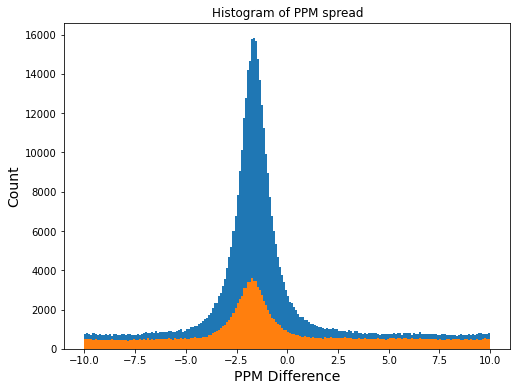

Data/Output/csodiaq_lib-human-31peaks-noloss-pt2mz-400to2000_exp-n1b_corrected.csv
191513
20174


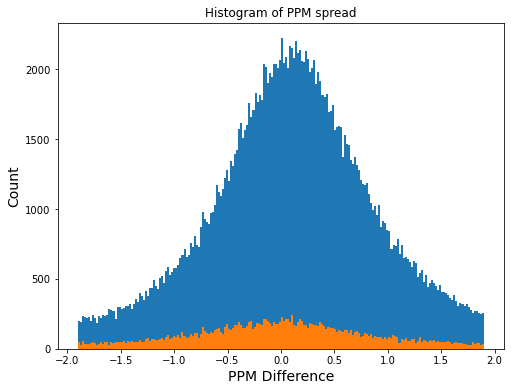

In [45]:
for x in csodiaq: menu.write_ppm_spread_decoy(x)
for x in csodiaq: 
    print(x)
    cff.draw_histogram_decoy(x)